In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
import textdistance
from sklearn.preprocessing import StandardScaler


def test_fields(field1, field2):
    X = df

    plt.figure(figsize=(8, 6))  # Tamaño opcional del gráfico
    plt.scatter(X[field1], X[field2], marker='o', color='blue', label='Ver')
    plt.grid(True)  # Opcional: activa la cuadrícula
    plt.show()

markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'H', 'x', '+', '<', '>', '1', '2', '3', '4']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
#%matplotlib widget
def jaccard_similarity(string1, string2):
    return textdistance.jaccard(string1, string2)

dfGDPGini = pd.read_csv("../../datasets/dfGDPGini.csv", index_col="Country Code")
df = pd.read_csv("../../datasets/countries of the world.csv", sep=",")
df.sort_values(by=['Area (sq. mi.)'], ascending=True, inplace=True)

        

In [2]:
pcolumns = ['Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service']

for c in pcolumns:
       df[c] = df[c].str.replace(',', '.').astype(float)


In [3]:
#Quito paises especiales, principados, zonas especiales
df = df[df["Area (sq. mi.)"]>6000]
dfFinal = df.copy()

In [4]:
dfGini = dfGDPGini
dfGini["Dummy"] = 1
dfFinal["Dummy"] = 1
dfMerged = pd.merge(dfGini, dfFinal, on=['Dummy'])
dfMerged['distance'] = dfMerged.apply(lambda x: jaccard_similarity(x['Country'], x['Country Name']), axis=1)

In [5]:
df = dfMerged[dfMerged['distance']>0.7]

In [6]:
df = df[['GiniFinal', 'Country', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service']]
df = df.dropna()
df.sort_values(by=['Industry'], ascending=True)

,GiniFinal,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
6210,0.652,Guinea-Bissau,1442029,36120,39.9,0.97,-1.57,107.17,800.0,42.4,7.4,10.67,8.82,80.51,37.22,16.53,0.620,0.120,0.260
16372,0.677,Vanuatu,208869,12200,17.1,20.72,0.00,55.16,2900.0,53.0,32.6,2.46,7.38,90.16,22.72,7.82,0.260,0.120,0.620
5189,0.693,Fiji,905949,18270,49.6,6.18,-3.14,12.62,5800.0,93.7,112.6,10.95,4.65,84.40,22.55,5.65,0.089,0.135,0.776
1402,0.622,Benin,7862944,112620,69.8,0.11,0.00,85.00,1100.0,40.9,9.7,18.08,2.40,79.52,38.85,12.22,0.316,0.138,0.546
6015,0.612,"Gambia, The",1641564,11300,145.3,0.71,1.57,72.02,1700.0,40.1,26.8,25.00,0.50,74.50,39.37,12.25,0.308,0.142,0.549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11124,0.588,Malaysia,24385858,329750,74.0,1.42,0.00,17.70,9000.0,88.7,179.0,5.48,17.61,76.91,22.86,5.05,0.084,0.480,0.436
11491,0.649,Nigeria,131859731,923768,142.7,0.09,0.26,98.80,900.0,68.0,9.3,31.29,2.96,65.75,40.43,16.94,0.269,0.487,0.244
2801,0.551,Chile,16134219,756950,21.3,0.85,0.00,8.80,9900.0,96.2,213.0,2.65,0.42,96.93,15.23,5.81,0.060,0.493,0.447
385,0.740,United Arab Emirates,2602713,82880,31.4,1.59,1.03,14.51,23200.0,77.9,475.3,0.60,2.25,97.15,18.96,4.40,0.040,0.585,0.375


In [7]:
pad = ["Marshall Islands", "Malawi",  "Vanuatu",  "Burkina Faso", 
       "Benin","United Arab Emirates", "Israel", "Angola", "Lithuania", "Giorgia", "Guinea-Bissau", 'Gambia, The',
       "Sri Lanka", "Guinea", "Malaysia", "Mongolia"]
df = df[~df['Country'].str.strip().isin(pad)]

In [8]:
df.to_csv("../../datasets/paises.csv")

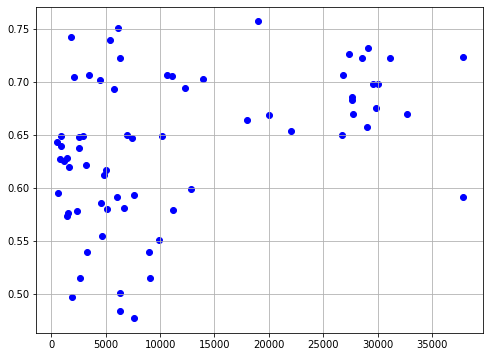

In [9]:
X = df

plt.figure(figsize=(8, 6))  # Tamaño opcional del gráfico
features = ["GDP ($ per capita)", "GiniFinal"]

plt.scatter(X[features[0]], X[features[1]], marker='o', color='blue', label='Ver')
plt.grid(True)  # Opcional: activa la cuadrícula
plt.show()

In [301]:
X

,GiniFinal,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
144,0.487000,Angola,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,45.11,24.20,0.096,0.658,0.246
192,0.701333,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,15.11,5.22,0.232,0.188,0.579
385,0.740000,United Arab Emirates,2602713,82880,31.4,1.59,1.03,14.51,23200.0,77.9,475.3,0.60,2.25,97.15,18.96,4.40,0.040,0.585,0.375
660,0.578750,Argentina,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,16.73,7.55,0.095,0.358,0.547
694,0.706500,Armenia,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,12.07,8.23,0.239,0.343,0.418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15942,0.599000,Uruguay,3431932,176220,19.5,0.37,-0.32,11.95,12800.0,98.0,291.4,7.43,0.23,92.34,13.91,9.05,0.093,0.311,0.596
16196,0.591333,United States,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,19.13,0.22,80.65,14.14,8.26,0.010,0.204,0.787
16300,0.637500,Vietnam,84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,16.86,6.22,0.209,0.410,0.381
16372,0.677000,Vanuatu,208869,12200,17.1,20.72,0.00,55.16,2900.0,53.0,32.6,2.46,7.38,90.16,22.72,7.82,0.260,0.120,0.620


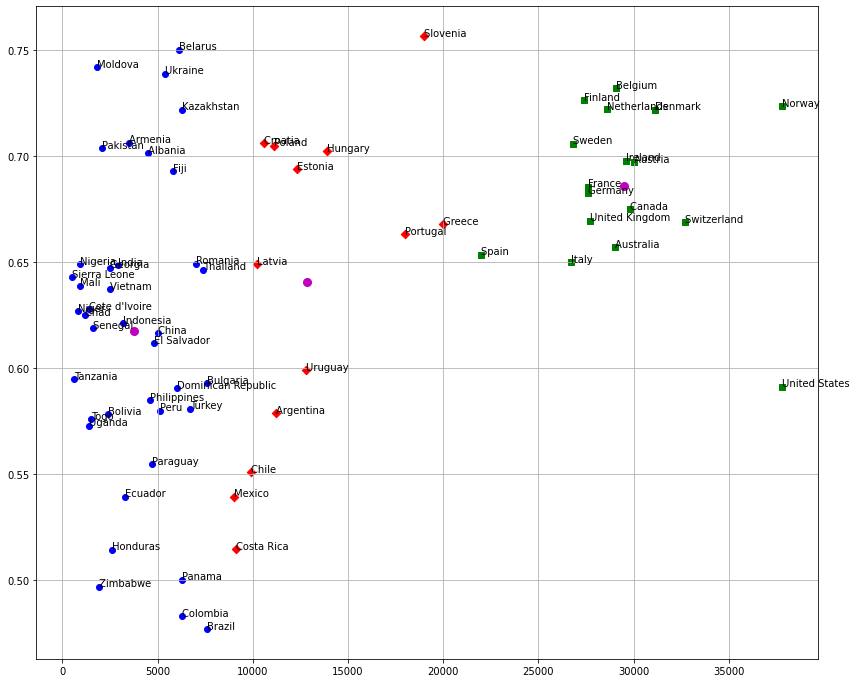

In [10]:
X = df[features]
n = 3
k_means = KMeans(n_clusters=n)
k_means.fit(X)
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_
df["cluster"] = etiquetas

fig, ax = plt.subplots(figsize=(14, 12))

markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'H', 'x', '+', '<', '>', '1', '2', '3', '4']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i in range(n):
    for index, row in df[etiquetas==i].iterrows():
        ax.scatter(row[features[0]],row[features[1]], marker=markers[i%len(markers)], color=colors[i%len(colors)])
        ax.annotate(row["Country"], (row[features[0]], row[features[1]]))


plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')
plt.grid(True)  # Opcional: activa la cuadrícula
plt.show()
#X[etiquetas==1]["Area (sq. mi.)"]


In [304]:
df[features]

,GDP ($ per capita),GiniFinal
144,1900.0,0.487000
192,4500.0,0.701333
385,23200.0,0.740000
660,11200.0,0.578750
694,3500.0,0.706500
...,...,...
15942,12800.0,0.599000
16196,37800.0,0.591333
16300,2500.0,0.637500
16372,2900.0,0.677000


In [27]:
sfeatures = ["sGDP", "sGINI"]
scaler = StandardScaler()
df.loc[:,sfeatures] = scaler.fit_transform(df[features])

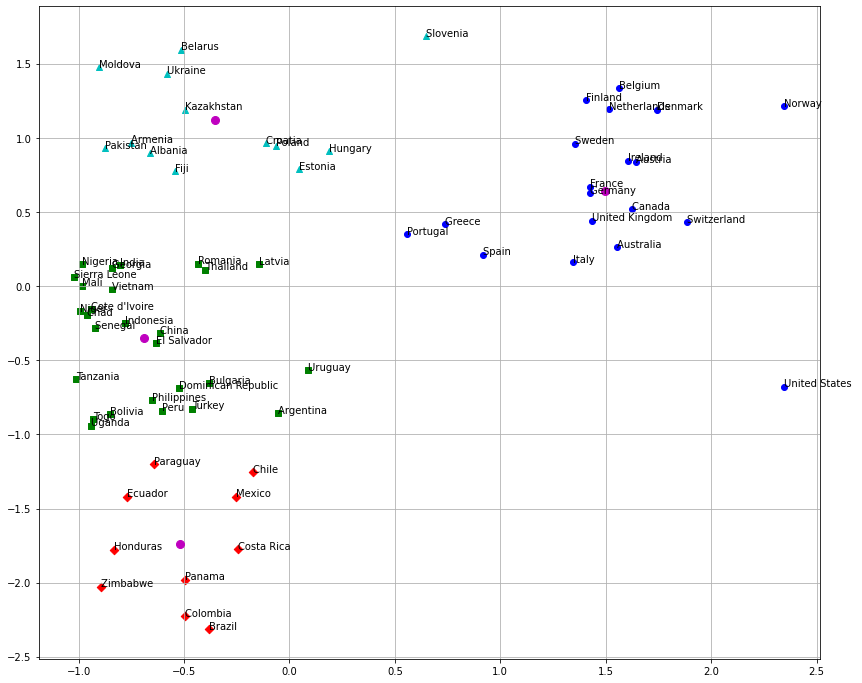

In [29]:
#Probar con 2, 3 y 4
n = 4
k_means = KMeans(n_clusters=n)
k_means.fit(df[sfeatures])
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_
df["cluster"] = etiquetas

fig, ax = plt.subplots(figsize=(14, 12))

markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'H', 'x', '+', '<', '>', '1', '2', '3', '4']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i in range(n):
    for index, row in df[etiquetas==i].iterrows():
        ax.scatter(row[sfeatures[0]],row[sfeatures[1]], marker=markers[i%len(markers)], color=colors[i%len(colors)])
        ax.annotate(row["Country"], (row[sfeatures[0]], row[sfeatures[1]]))


plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')
plt.grid(True)  # Opcional: activa la cuadrícula
plt.show()
#X[etiquetas==1]["Area (sq. mi.)"]

K: 1 - WSS:138
K: 2 - WSS:63
K: 3 - WSS:32
K: 4 - WSS:20
K: 5 - WSS:17
K: 6 - WSS:13
K: 7 - WSS:11
K: 8 - WSS:9
K: 9 - WSS:8


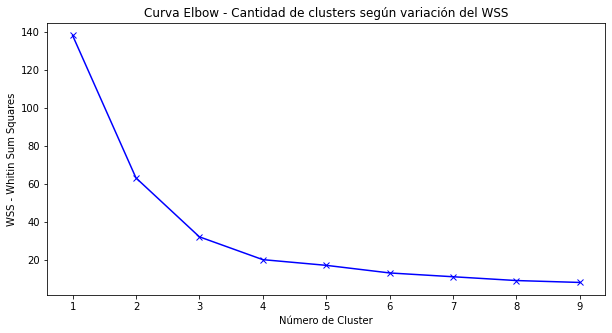

In [30]:
#Que dice elbow?
nClusters = range(1,10,1)
X = df[sfeatures]
# Definimos una función que para un "k" dado corre el método kmeans sobre el dataset y devuelve el modelo generado.
def correrKmeans(k, dt):
    km = KMeans(n_clusters=k, n_init=10)
    score = round(km.fit(dt).score(dt)*-1)
    print ("K: "+str(k)+" - WSS:"+str(score)) 
    return score

# Ejecutamos
scores = [correrKmeans(k, X) for k in nClusters ]
plt.figure(figsize=(10, 5))
plt.plot(nClusters,scores,'bx-')
plt.xlabel('Número de Cluster')
plt.ylabel('WSS - Whitin Sum Squares')
plt.title('Curva Elbow - Cantidad de clusters según variación del WSS')
plt.show()

In [31]:
def test_fields_wKmeans(Fields, n):
    X = df[Fields]
    k_means = KMeans(n_clusters=n)
    k_means.fit(X)
    centroides = k_means.cluster_centers_
    etiquetas = k_means.labels_
    df["cluster"] = etiquetas
    if(len(Fields)==2):
        Field1 = Fields[0]
        Field2 = Fields[1]
        fig, ax = plt.subplots(figsize=(14, 12))
        markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'H', 'x', '+', '<', '>', '1', '2', '3', '4']
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
        for i in range(n):
            for index, row in df[df["cluster"]==i].iterrows():
                ax.scatter(row[Field1],row[Field2], marker=markers[i%len(markers)], color=colors[i%len(colors)])
                ax.annotate(row["Country"], (row[Field1], row[Field2]))
        plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')
        plt.grid(True)  # Opcional: activa la cuadrícula
        plt.show()


In [32]:
df.columns

Index(['GiniFinal', 'Country', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service', 'cluster', 'sGDP', 'sGINI'],
      dtype='object')

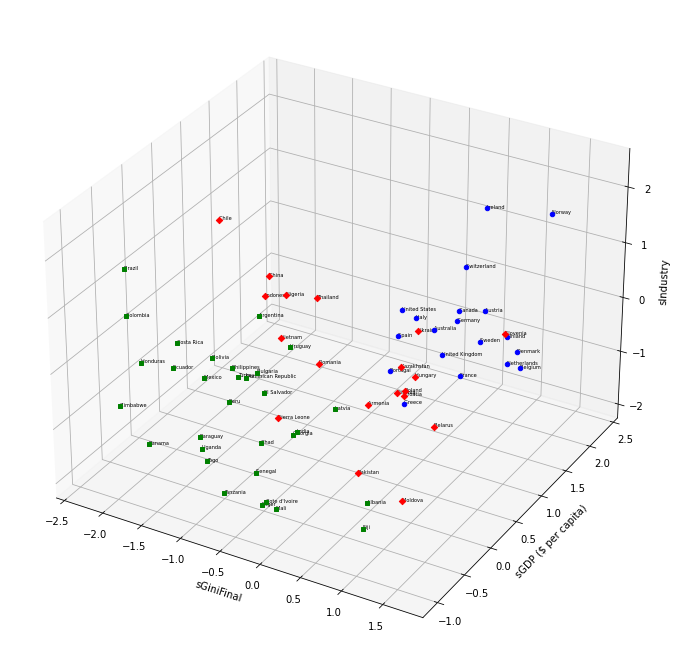

In [33]:
def test_fields_3D_wKmeans(df, features, n):

    if(len(features)!=3):
        raise "Only for 3 features"
    
    markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'H', 'x', '+', '<', '>', '1', '2', '3', '4']
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
 
    sfeatures = ["s"+f for f in features]
    scaler = StandardScaler()
    df.loc[:,sfeatures] = scaler.fit_transform(df[features])
    
    
    k_means = KMeans(n_clusters=n)
    k_means.fit(df[sfeatures])
    centroides = k_means.cluster_centers_
    etiquetas = k_means.labels_
    df["cluster"] = etiquetas

    fig = plt.figure(figsize=(14, 12))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(n):
        for index, row in df[df["cluster"]==i].iterrows():
            ax.scatter(row[sfeatures[0]],row[sfeatures[1]],row[sfeatures[2]], marker=markers[i%len(markers)], color=colors[i%len(colors)])
            ax.text(row[sfeatures[0]],row[sfeatures[1]],row[sfeatures[2]], row["Country"], size=5, zorder=1, color='k')
            #ax.annotate(row["Country"], (row[Field1], row[Field2], row[Field3]))
    # For each set of style and range settings, plot n random points in the box
    # defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
    ax.set_xlabel(sfeatures[0])
    ax.set_ylabel(sfeatures[1])
    ax.set_zlabel(sfeatures[2])
    #plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')
    plt.show()
    

features = ['GiniFinal', 'GDP ($ per capita)', 'Industry']
"""
Index(['GiniFinal', 'Country', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service', 'cluster', 'sGDP', 'sGINI'],
      dtype='object')
"""
      
test_fields_3D_wKmeans(df, features, 3) 



